## Оценка вероятностей в задаче классификации

В предыдущем уроке мы научились предсказывать метку класса, как знак от произведения вектора признаков на вектор весов:
\begin{equation*}
y = sign(\sum_{i=1}^N \theta_ix_i) = sign(X\Theta)
\end{equation*}

Мы узнали, что линейный классификатор строит гиперплоскость в пространстве признаков:
\begin{equation*}
X\Theta = 0
\end{equation*}

НО! Мы учитывали только $sign(X\Theta)$

* И если $X\Theta > 0$, мы относили к классу 1,


* Если $X\Theta < 0$, относили к классу -1

Никак не учитывали то, насколько далеко объект попал от разделяющей гиперплоскости.

* сама величина $X\Theta$, как раз характеризует расстояние от объекта до гиперплоскости

\begin{equation*}
d = \dfrac{X\Theta}{\|\Theta\|} \sim X\Theta
\end{equation*}


Хотелосьбы както использовать это значение, чтобы понимать насколько сильно мы уверены в прогнозе

Как можно обозначать степень уверенности?

Например вероятностью принадлежности к классу

Давайте попробуем предсказть *вероятности принадлежности к каждому классу*

У нас всего два класса:
* iris setosa 
* iris virginica

Будем пробовать предсказывать условную вероятность принадлежности классу *iris virginica*:

\begin{equation*}
P(y=iris\_virginica|X) \\
P(y=iris\_setosa|X) = 1 - P(y=iris\_virginica|X)
\end{equation*}

Так как вероятности распределены от 0 до 1, давайте и истинные метки классов сделаем 0 и 1
 * iris setosa 0
 * iris virginica 1

In [22]:
y = kind_iris.copy()
y[y=='iris setosa'] = 0
y[y=='iris virginica'] = 1
y = y.astype(int)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


Можем попробовать обучить линейную регрессию предсказывать метки 0 и 1:
\begin{equation*}
\Theta_{opt} = \operatorname*{argmin}_\Theta \sum_{i=1}^N(\theta_0 +  \theta_1x_{i,1} + \theta_2x_{i,2} - y_i)^2 = \operatorname*{argmin}_\Theta \sum_{i=1}^N (X_i\Theta - y_i)^2 \\
P(y_i=iris\_virginica|X_i) = X_i\Theta_{opt}
\end{equation*}

$X_i = \begin{pmatrix} 1&  x_{i,1} & x_{i,2}\end{pmatrix}$ - Вектор признаков $i$ - го объекта

$x_{i,1}$ - Длина чашелистника на $i$-ом объекте
 
$x_{i,2}$ - Ширина чашелистника на $i$-ом объекте
 
$y_i \in$ {0,1} - Истинная метка класса
 
$\Theta = \begin{pmatrix}\theta_0 &  \theta_1 & \theta_2\end{pmatrix}^T$- параметры модели (веса)


Тогда финальное решение о метке класса можно отбирать по порогу $p_0$:
\begin{equation*}
 y_i = 
 \begin{cases}
   iris\_virginica, &\text{$X_i\Theta \geqslant p_0$}\\
   iris\_setosa, &\text{$X_i\Theta < p_0$}\\
 \end{cases}
\end{equation*}

$p_0$ можно взять, например $p_0 = 0.5$

Но $X_i\Theta$ не обзятельно будет лежать в интервале [0,1], $X_i\Theta \in \mathbb{R}$, это очень странно для вероятности

Чтобы выход модели принимал значение от 0 до 1, можем взять функцию от $X_i\Theta$:

\begin{equation*}
f: \mathbb{R}\rightarrow [0,1] 
\end{equation*}

Каие у нее должны быть требования?
 * Непрерывная
 * Неубывающая
 * $f(-\infty) = 0$
 * $f(+\infty) = 1$

Например такими свойствами обладает функция **сигмоида**



\begin{equation*}
\sigma(t) = \dfrac{1}{1+e^{-t}}
\end{equation*}


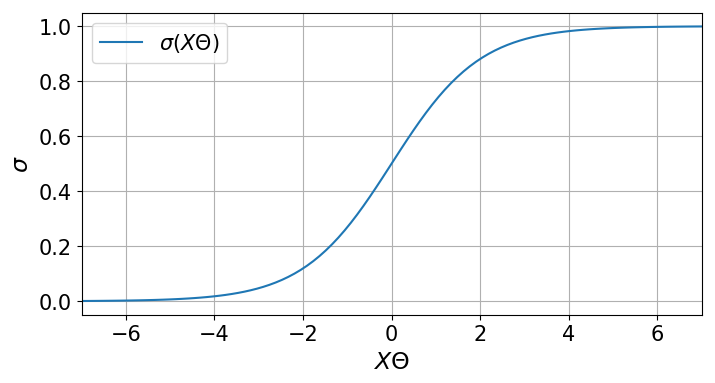

In [23]:
plot_sigmoid()

\begin{equation*}
P(y=iris\_virginica|X) = \sigma(\theta_0 + \theta_1 x_1 + \theta_2 x_2)\\
P(y=iris\_virginica|X) = \sigma(X\Theta) \\
y = 
 \begin{cases}
   iris\_virginica, &\text{$\sigma(X_i\Theta) \geqslant p_0$}\\
   iris\_setosa, &\text{$\sigma(X_i\Theta) < p_0$}\\
 \end{cases}
\end{equation*}


\begin{equation*}
\Theta_{opt} = \operatorname*{argmin}_\Theta \sum_{i=1}^N(\sigma(\theta_0 +  \theta_1x_{i,1} + \theta_2x_{i,2}) - y_i)^2 = \\ =\operatorname*{argmin}_\Theta \sum_{i=1}^N (\sigma(X_i\Theta) - y_i)^2 \\
\end{equation*}

MSE хорошо оценивает среднее значение, для вероятностей это не совсем подходит

Обозначим $\tilde p(X)=P(y=iris\_virginica|X) = \sigma(X\Theta)$

Рассмотрим следующую функцию:
\begin{equation*}
L = \prod\limits_{i = 1}^N\tilde p(X_i)^{y_i}(1-\tilde p(X_i))^{(1-y_i)}
\end{equation*}

Замети, что чем ближе $\tilde p(X_i)$ к истиным ответам $y_i$, тем болеше значение $L$.

В матеиматичесской статистике $L$ называют функцией правдоподобия

Так как функция $L$ представляет собой произведение, искать производную затруднительно

Для максимизации правдоподобия обычно берут логарифм от $L$, так как логарифм монотонно возрастает, значит максимум логарифма сопадает с максимумом аргумента

\begin{equation*}
\Theta_{opt} = \operatorname*{argmax}_\Theta \prod\limits_{i = 1}^N\tilde p(X_i)^{y_i}(1-\tilde p(X_i))^{(1-y_i)}\\
\Theta_{opt} = \operatorname*{argmax}_\Theta \ln(\prod\limits_{i = 1}^N\tilde p(X_i)^{y_i}(1-\tilde p(X_i))^{(1-y_i)}) \\
\Theta_{opt} = \operatorname*{argmax}_\Theta \ln(\prod\limits_{i = 1}^N\tilde p(X_i)^{y_i}(1-\tilde p(X_i))^{(1-y_i)}) \\
\Theta_{opt} = \operatorname*{argmax}_\Theta \sum\limits_{i = 1}^N\ln\tilde p(X_i)^{y_i} + \ln((1-\tilde p(X_i))^{(1-y_i)})\\
\Theta_{opt} = \operatorname*{argmax}_\Theta \sum\limits_{i = 1}^N y_i\ln(\tilde p(X_i) + (1-y_i)\ln(1-\tilde p(X_i))
\end{equation*}

Но так как мы уже привыкли минимизировать функцию ошибки, 

возьмем $\tilde L = -\ln(L)$ и будем минимизировать $\tilde L$

\begin{equation*}
\tilde L = -\ln(L)\\
\Theta_{opt} = \operatorname*{argmin}_\Theta \tilde L\\
\Theta_{opt} = \operatorname*{argmin}_\Theta \sum\limits_{i = 1}^N -y_i\ln(\tilde p(X_i) - (1-y_i)\ln(1-\tilde p(X_i))\\
\Theta_{opt} = \operatorname*{argmin}_\Theta \sum\limits_{i = 1}^N -y_i\ln(\sigma(X_i\Theta)) - (1-y_i)\ln(1 -\sigma(X_i\Theta))
\end{equation*}

Функцию ошибки $\tilde L$ еще можно переписать в следующем виде:
\begin{equation*}
\tilde L = \sum\limits_{i = 1}^N -y_i\ln(\sigma(X_i\Theta)) - (1-y_i)\ln(1 -\sigma(X_i\Theta))\\
\tilde L = \sum\limits_{i = 1}^N L_i \\
\tilde L_i  = 
 \begin{cases}
   -\ln(\sigma(X_i\Theta)), &y_i=1\\
  \ln(1 -\sigma(X_i\Theta)), &y_i=0\\
 \end{cases} \\
\end{equation*}

Функцию ошибки $\tilde L$ называют **кросс-энтропия (сross entropy)**.

Почему такая функция ошибки оптимальнее *MSE*?

* Рассмотрим пример, когда истинный класс $y$ = 1

Тогда ошибка MSE:

* $L_{mse} = (1 - sogmoid(X\Theta))^2$

Ошибка по кросс-энтропии:

* $L_{ce} = -\ln(\sigma(X\Theta))$

Возьмем производные от ошибок по вектору весов $\Theta$:

* $\dfrac{\partial L_{mse}}{\partial\Theta} = -2(1 - \sigma(X\Theta))\dfrac{\partial \sigma(X\Theta)}{\partial\Theta} =  - 2(1 - \sigma(X\Theta)) * DS$


* $\dfrac{\partial L_{ce}}{\partial\Theta} = \dfrac{-1}{\sigma(X\Theta)}\dfrac{\partial \sigma(X\Theta)}{\partial\Theta}  = \dfrac{-1}{\sigma(X\Theta)} * DS$



* $DS = \dfrac{\partial \sigma(X\Theta)}{\partial\Theta}$

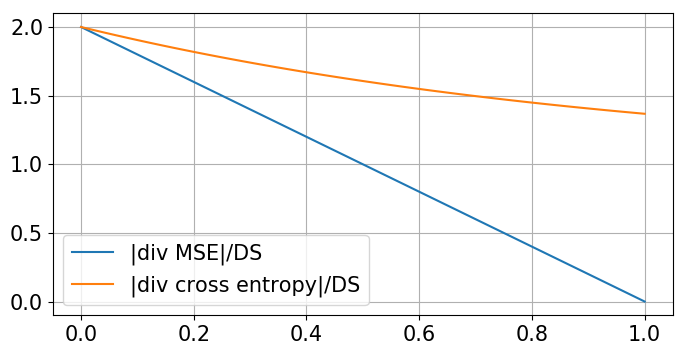

In [24]:
plot_div_mse_ce()

Как видим из графика, абсолютное значекние функции ошибки *cross entropy* больше, чем у *MSE*

*cross entropy*  сильнее штрафует за неправильный ответ, поэтому лучше обновляет веса при градиантном спуске

Если переобозначить метку класса 0 за -1, то кросс-энтропия примит знакомый нам вид:
\begin{equation*}
\tilde L = \sum_{i=1}^N ln(1 + e^{-y_i \cdot X_i\Theta})
\end{equation*}

Оптимизируя кросс энтропию, мы оптимизируем логистичесскую функцию потерь

Линейная модель, которой мы предсказываем вероятность принадлежности к классу 1 с 

логистичесской функцие потерь, называется **Логистичесская регрессия (Logistic regression)**.

Соберем все вместе и обучим *логистическую регрессию* предсказывать вид цветка Ириса

Нам нужно научиться брать производную от *сигмоиды*
\begin{equation*}
\sigma(t) = \dfrac{1}{1+e^{-t}} \\ \\
\dfrac{d \sigma(t)}{dt} = \dfrac{e^{-t}}{(1+e^{-t})^2} = \dfrac{e^{-t}+1-1}{(1+e^{-t})^2} = \\
\dfrac{1}{1+e^{-t}} - \dfrac{1}{(1+e^{-t})^2} = \\
\sigma(t)(1-\sigma(t))\\
\dfrac{d \sigma(t)}{dt} = \sigma(t)(1-\sigma(t))
\end{equation*}

Производная функции ошибки:
\begin{equation*}
\tilde L = -\sum\limits_{i = 1}^N y_i\ln(\sigma(X_i\Theta)) + (1-y_i)\ln(1 -\sigma(X_i\Theta)) \\
\dfrac{\partial \tilde L(\Theta)}{\partial \theta_j} = -\sum\limits_{i = 1}^Ny_i\dfrac{\sigma(X_i\Theta)(1-\sigma(X_i\Theta)}{\sigma(X_i\Theta)}x_{i,j} - (1-y_i)\dfrac{\sigma(X_i\Theta)(1-\sigma(X_i\Theta))}{1-\sigma(X_i\Theta)}x_{i,j} = \\
= -\sum\limits_{i = 1}^Ny_i(1-\sigma(X_i\Theta))x_{i,j} - (1-y_i)\sigma(X_i\Theta)x_{i,j} 
\end{equation*}

Интересное замечание:
* $y_i=1$, штраф равен вероятности нулевого класса
* $y_i=0$, штраф равен вероятности первого класса

Суммарная ошибка равна сумме вероятностей противоположных классов

Особо внимательные могли заметить сходство производной кросс-энтропии и MSE в задаче *линейной регрессии*.

Это говорит о схожей прирде логистичесской регрессии и линейной регресси с функцией ошибки MSE

Теперь у нас все готово для реализации *Логистичесской регресии*

Как всегда добавим единицу первым столбцом данных

In [25]:
def create_data(X):
    X_ones = np.ones(X.shape[0])
    return np.column_stack([X_ones, X])

X_train = create_data(X)

Напишем функцию сигмоида \begin{equation*}
\sigma(x) = \dfrac{1}{1+e^{-x}}
\end{equation*}



In [26]:
def sigmoid(x):
    return 1/(1+np.e**(-x))

Зададим начальные параметры весов случайными значениями от 0 до 1:

In [27]:
Theta = np.random.random_sample(size=(X_train.shape[1],))
print(Theta)

[0.57658541 0.81708875 0.0740257 ]


Подсчет градианта:
$\dfrac{\partial \tilde L(\Theta)}{\partial \theta_j}
= -\sum\limits_{i = 1}^Ny_i(1-\sigma(X_i\Theta))x_{i,j} - (1-y_i)\sigma(X_i\Theta)x_{i,j}$

In [28]:
def gradient_function(Theta, X, y):
    grad = np.zeros_like(Theta)
    for j in range(Theta.shape[0]):       
        grad[j] = -sum(y*(1-sigmoid(X@Theta))*X[:,j] - (1-y)*sigmoid(X@Theta)*X[:,j])
    return grad

Градиентный спуск: 

$\theta_{j_{new}} = \theta_j - \alpha \dfrac{\partial \tilde L(\Theta)}{\partial \theta_j}$  
$\theta_{j_{new}} = \theta_j - \alpha (-\sum\limits_{i = 1}^Ny_i(1-\sigma(X_i\Theta))x_{i,j} - (1-y_i)\sigma(X_i\Theta)x_{i,j})$

In [29]:
def gradient_descent(Theta, X, y, alpha, iters):        
    theta = Theta
    for i in range (iters):
        theta = theta - alpha * gradient_function(theta, X, y)
    return theta

In [30]:
theta_opt = gradient_descent(Theta, X_train, y, 0.01, 1000)
theta_opt

array([ -3.70508776,   6.49231179, -10.47422709])

In [31]:
def predict_function(X_train, theta):
    y_pred = np.dot(X_train, theta) #X @ Theta
    return sigmoid(y_pred)

y_pred = predict_function(X_train, theta_opt)
y_pred

array([7.06774107e-04, 3.50452461e-02, 1.21870256e-03, 1.81372441e-03,
       1.29623567e-04, 7.51394477e-05, 7.84613760e-05, 1.05211425e-03,
       4.01308267e-03, 1.25815314e-02, 6.10120174e-04, 2.87395658e-04,
       1.86209329e-02, 7.38000106e-04, 3.53742425e-04, 2.80106030e-06,
       7.51394477e-05, 7.06774107e-04, 1.49972379e-03, 3.05425093e-05,
       1.39397061e-02, 8.70502604e-05, 9.65841799e-06, 5.71319659e-03,
       2.87395658e-04, 6.49969125e-02, 1.05211425e-03, 1.35194078e-03,
       3.84381559e-03, 1.21870256e-03, 6.61291971e-03, 1.39397061e-02,
       2.52467043e-06, 6.21134633e-06, 1.25815314e-02, 8.48397954e-03,
       9.40403671e-03, 6.77256736e-05, 1.41163063e-03, 2.01188411e-03,
       3.69376890e-04, 8.05274604e-01, 1.73971939e-04, 3.69376890e-04,
       3.05425093e-05, 1.86209329e-02, 3.05425093e-05, 6.37078625e-04,
       3.18848533e-04, 2.99301006e-03, 9.32863257e-01, 9.96563665e-01,
       9.99982749e-01, 9.98910796e-01, 9.99152403e-01, 9.99999329e-01,
      

Давайте опять посмотрим на долю неверных ответов, но теперь нам нужен порог $p_0$ преодалев который мы будем считать, что классификатор дал ответ 1

In [32]:
def error(y, y_pred, p=0.5):
    return np.mean((y_pred > p).astype(int) != y)

In [33]:
P = np.linspace(0,1,11)
for p in P:
    p = round(p,1)
    err = error(y, y_pred, p=p)
    print("Порог = {}, доля неверных ответов = {}".format(p, err))

Порог = 0.0, доля неверных ответов = 0.5
Порог = 0.1, доля неверных ответов = 0.01
Порог = 0.2, доля неверных ответов = 0.01
Порог = 0.3, доля неверных ответов = 0.01
Порог = 0.4, доля неверных ответов = 0.01
Порог = 0.5, доля неверных ответов = 0.01
Порог = 0.6, доля неверных ответов = 0.01
Порог = 0.7, доля неверных ответов = 0.01
Порог = 0.8, доля неверных ответов = 0.02
Порог = 0.9, доля неверных ответов = 0.03
Порог = 1.0, доля неверных ответов = 0.5


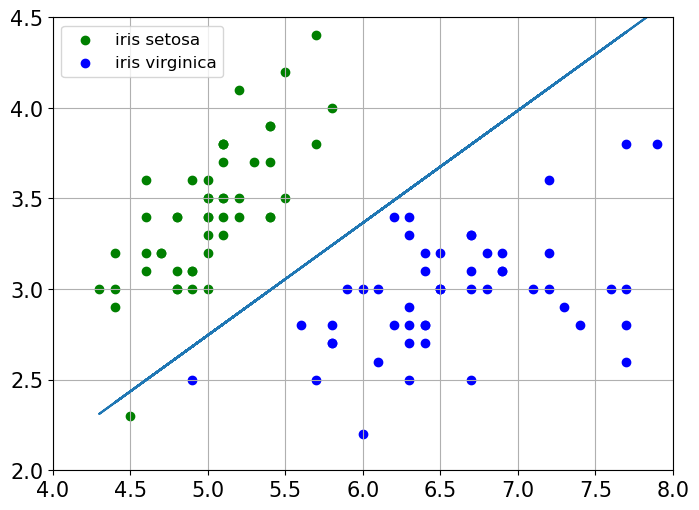

In [34]:
plot_finaly_trained_model(X, kind_iris, theta_opt)

Чтобы всякий раз не писать градиентный спуск в ручную, логистичесская регрессия есть в библиотеке scikit-learn

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
clf = LogisticRegression()
clf.fit(X,y)
y_pred_sklearn = clf.predict(X)
y_pred_sklearn

C:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Метод predict возвращает метки классов по порогу 0.5, чтобы получить вероятности классов, нужно вызвать метод predict_proba

In [37]:
y_pred_prob_sklearn = clf.predict_proba(X)
y_pred_prob_sklearn

array([[0.9120516 , 0.0879484 ],
       [0.73158284, 0.26841716],
       [0.89454863, 0.10545137],
       [0.88075254, 0.11924746],
       [0.94817404, 0.05182596],
       [0.95720203, 0.04279797],
       [0.95516381, 0.04483619],
       [0.90029017, 0.09970983],
       [0.848462  , 0.151538  ],
       [0.79507057, 0.20492943],
       [0.91692865, 0.08307135],
       [0.93274622, 0.06725378],
       [0.77158306, 0.22841694],
       [0.90806962, 0.09193038],
       [0.93100346, 0.06899654],
       [0.98564501, 0.01435499],
       [0.95720203, 0.04279797],
       [0.9120516 , 0.0879484 ],
       [0.89193074, 0.10806926],
       [0.96764941, 0.03235059],
       [0.79282498, 0.20717502],
       [0.95457226, 0.04542774],
       [0.97735833, 0.02264167],
       [0.83654631, 0.16345369],
       [0.93274622, 0.06725378],
       [0.6874156 , 0.3125844 ],
       [0.90029017, 0.09970983],
       [0.89324675, 0.10675325],
       [0.85461252, 0.14538748],
       [0.89454863, 0.10545137],
       [0.

Так как классификация бинарная, первым столбцом predict_proba вернул вероятность нулевого класса, а вторым вероятность первого

Параметры модели $\Theta$ хранятся в поле intercept_ ($\theta_0$) и coef_ ($\theta_1, \theta_2$)

In [38]:
print(clf.intercept_, clf.coef_)

[-0.92533091] [[ 2.1460357  -3.53097071]]


### Вывод
1. Помимо предсказания метки класса, мы научились оценивать уверенность такого предсказания, как вероятность принадлежности первому классу:
\begin{equation*}
P(y=1|X) = \sigma(X\Theta), \\
P(y=0|X) = 1 - \sigma(X\Theta).
\end{equation*}
2. Для обучения классификатора мы выбрали функцию ошибки *cross entropy*, т.к она сильнее штрафует за неправильный ответ, чем *MSE* в задаче классификации.